In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx

In [2]:
transaction_data = pd.read_csv(r'C:\Users\alons\retailer_mb\Market Basket Analysis.csv')

transaction_data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
transaction_data['Date'] = pd.to_datetime(transaction_data['Date'])
transaction_data['month'] = transaction_data['Date'].dt.month
print(transaction_data.head())

   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   Price  CustomerID         Country  month  
0   2.55     17850.0  United Kingdom     12  
1   3.39     17850.0  United Kingdom     12  
2   2.75     17850.0  United Kingdom     12  
3   3.39     17850.0  United Kingdom     12  
4   3.39     17850.0  United Kingdom     12  


In [4]:
transaction_data.dtypes

BillNo                 int64
Itemname              object
Quantity               int64
Date          datetime64[ns]
Price                float64
CustomerID           float64
Country               object
month                  int32
dtype: object

In [5]:
transaction_data.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134038
Country            0
month              0
dtype: int64

In [6]:
transaction_data.dropna(subset=['Itemname'], inplace=True)
transaction_data.isnull().sum()

BillNo             0
Itemname           0
Quantity           0
Date               0
Price              0
CustomerID    132583
Country            0
month              0
dtype: int64

In [7]:
#makes non account holders 0 value in 'customerid'
transaction_data['CustomerID'].fillna(0, inplace=True)

# Converts those with customerid and account holders to a 1 value
transaction_data['CustomerID'] = transaction_data['CustomerID'].apply(lambda x: 1 if x != 0 else 0)

transaction_data.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
month         0
dtype: int64

In [8]:
transaction_data['Total'] = transaction_data['Quantity'] * transaction_data['Price']
transaction_data[:5]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,month,Total
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,1,United Kingdom,12,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,1,United Kingdom,12,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,1,United Kingdom,12,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,1,United Kingdom,12,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,1,United Kingdom,12,20.34


In [9]:
#gathers the data from december 

In [10]:
december_data=transaction_data[transaction_data['Date'].dt.month ==12]
print(december_data)

        BillNo                             Itemname  Quantity  \
0       536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365                  WHITE METAL LANTERN         6   
2       536365       CREAM CUPID HEARTS COAT HANGER         8   
3       536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...                                  ...       ...   
522056  581587          PACK OF 20 SPACEBOY NAPKINS        12   
522057  581587          CHILDREN'S APRON DOLLY GIRL         6   
522058  581587         CHILDRENS CUTLERY DOLLY GIRL         4   
522059  581587      CHILDRENS CUTLERY CIRCUS PARADE         4   
522060  581587         BAKING SET 9 PIECE RETROSPOT         3   

                      Date  Price  CustomerID         Country  month  Total  
0      2010-12-01 08:26:00   2.55           1  United Kingdom     12  15.30  
1      2010-12-01 08:26:00   3.39           1  United Kingdom  

In [11]:
unique_item_count = december_data['Itemname'].nunique()
print("total unique items sold:", unique_item_count)

total unique items sold: 3435


In [12]:
items_count= december_data['Itemname'].value_counts()
print(items_count)

Itemname
WHITE HANGING HEART T-LIGHT HOLDER    292
PAPER CHAIN KIT 50'S CHRISTMAS        292
REGENCY CAKESTAND 3 TIER              231
PAPER CHAIN KIT VINTAGE CHRISTMAS     225
SCOTTIE DOG HOT WATER BOTTLE          223
                                     ... 
FRESHWATER PEARL BRACELET GOLD          1
JARDIN ETCHED GLASS FRUITBOWL           1
ACRYLIC JEWEL SNOWFLAKEPINK             1
PINK FLY SWAT                           1
WRAP ALPHABET POSTER                    1
Name: count, Length: 3435, dtype: int64


In [13]:
december_data['Price'].describe()

count    65905.000000
mean         4.517170
std         59.281987
min          0.000000
25%          1.250000
50%          2.460000
75%          4.210000
max      13541.330000
Name: Price, dtype: float64

In [14]:
basket_total= december_data.groupby('BillNo')['Total'].sum()
basket_total[:5]

BillNo
536365    139.12
536366     22.20
536367    278.73
536368     70.05
536369     17.85
Name: Total, dtype: float64

In [15]:
basket_total.describe()

count      2392.000000
mean        601.770886
std        3652.399906
min           0.000000
25%         125.725000
50%         259.600000
75%         425.315000
max      168469.600000
Name: Total, dtype: float64

In [16]:
#amt of items purchased per person/basket
basket_size=december_data.groupby('BillNo')['Quantity'].sum()
basket_size[:5]

BillNo
536365    40
536366    12
536367    83
536368    15
536369     3
Name: Quantity, dtype: int64

In [17]:
basket_size.describe()

count     2392.000000
mean       274.318144
std       1715.592778
min      -1050.000000
25%         54.000000
50%        120.000000
75%        240.000000
max      80995.000000
Name: Quantity, dtype: float64

In [18]:
#Combined all rows into baskets accroding to 'BillNo'
basket = (december_data.groupby(['BillNo', 'Itemname'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('BillNo'))


basket[:]

Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,damages?,dotcom,faulty,found,lost,missing,mixed up,smashed,wet,wet boxes
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
items_frequency= items_count/len(basket)
items_frequency[:11]

Itemname
WHITE HANGING HEART T-LIGHT HOLDER    0.122074
PAPER CHAIN KIT 50'S CHRISTMAS        0.122074
REGENCY CAKESTAND 3 TIER              0.096572
PAPER CHAIN KIT VINTAGE CHRISTMAS     0.094064
SCOTTIE DOG HOT WATER BOTTLE          0.093227
CHOCOLATE HOT WATER BOTTLE            0.091137
HAND WARMER BABUSHKA DESIGN           0.078177
WHITE SKULL HOT WATER BOTTLE          0.075251
HEART OF WICKER SMALL                 0.074415
HAND WARMER BIRD DESIGN               0.073997
JAM MAKING SET PRINTED                0.073161
Name: count, dtype: float64

C:\Users\alons\AppData\Local\Temp\ipykernel_14148\3514876121.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


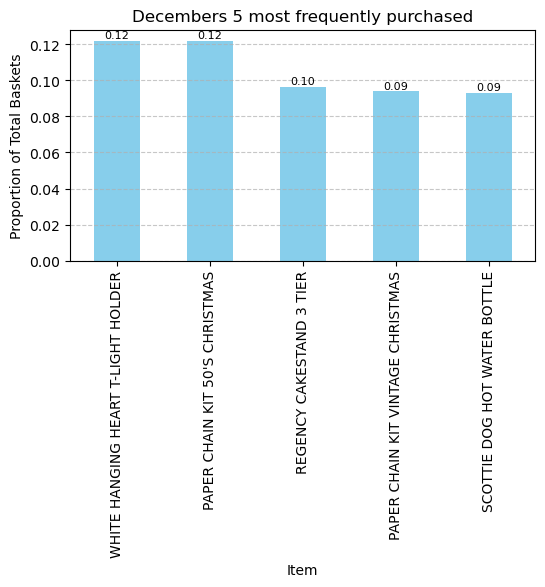

In [20]:
plt.figure(figsize=(6, 3))
ax = items_frequency[:5].plot(kind='bar', color='skyblue', width=0.5)
plt.title('Decembers 5 most frequently purchased')
plt.xlabel('Item')
plt.ylabel('Proportion of Total Baskets')
plt.xticks(rotation=90)

# Add annotations above each bar
for i, v in enumerate(items_frequency[:5]):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
#Tells us if the item was purchased or not making it the values binary
basket_sets = basket.apply(lambda x: x > 0, axis=1)

basket_sets

Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,damages?,dotcom,faulty,found,lost,missing,mixed up,smashed,wet,wet boxes
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581584,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581585,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# set parameters
min_support= .03
min_confidence = .5
max_length = 2

In [23]:
# Generate frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=min_support,  use_colnames=True)
print(frequent_itemsets)

      support                                           itemsets
0    0.031773                    (12 PENCIL SMALL TUBE WOODLAND)
1    0.031355              (12 PENCILS SMALL TUBE RED RETROSPOT)
2    0.032609                         (3 STRIPEY MICE FELTCRAFT)
3    0.030518                      (4 TRADITIONAL SPINNING TOPS)
4    0.043896                           (6 RIBBONS RUSTIC CHARM)
..        ...                                                ...
168  0.030100  (WHITE HANGING HEART T-LIGHT HOLDER, PAPER CHA...
169  0.032609  (WHITE HANGING HEART T-LIGHT HOLDER, RED HANGI...
170  0.036789  (SCOTTIE DOG HOT WATER BOTTLE, RETROSPOT HEART...
171  0.030100  (SCOTTIE DOG HOT WATER BOTTLE, WHITE SKULL HOT...
172  0.030518  (WOODEN FRAME ANTIQUE WHITE, WOODEN PICTURE FR...

[173 rows x 2 columns]


In [24]:
# Generate association rules
selected_columns = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)[selected_columns]
rules[:20]

,antecedents,consequents,support,confidence,lift
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.045987,0.763889,11.865079
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.045987,0.714286,11.865079
2,(CHOCOLATE HOT WATER BOTTLE),(HOT WATER BOTTLE I AM SO POORLY),0.045569,0.521531,7.845927
3,(HOT WATER BOTTLE I AM SO POORLY),(CHOCOLATE HOT WATER BOTTLE),0.045569,0.685535,7.845927
4,(HOT WATER BOTTLE TEA AND SYMPATHY),(CHOCOLATE HOT WATER BOTTLE),0.031773,0.513514,5.877150
5,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.030100,0.774194,19.290323
6,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.030100,0.750000,19.290323
7,(HAND WARMER OWL DESIGN),(HAND WARMER BIRD DESIGN),0.038043,0.587097,8.117546
8,(HAND WARMER BIRD DESIGN),(HAND WARMER OWL DESIGN),0.038043,0.526012,8.117546
9,(HAND WARMER SCOTTY DOG DESIGN),(HAND WARMER BIRD DESIGN),0.035117,0.622222,8.603211


In [25]:
rules['itemsets'] = rules['antecedents'].apply(lambda x: ', '.join(map(str, x))) + ' -> ' + rules['consequents'].apply(lambda x: ', '.join(map(str, x)))


In [26]:
#by support
rules.sort_values(by="support", ascending= False)[:11]

,antecedents,consequents,support,confidence,lift,itemsets
15,(PAPER CHAIN KIT 50'S CHRISTMAS),(PAPER CHAIN KIT VINTAGE CHRISTMAS),0.059783,0.516245,5.770370,PAPER CHAIN KIT 50'S CHRISTMAS -> PAPER CHAIN ...
14,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.059783,0.668224,5.770370,PAPER CHAIN KIT VINTAGE CHRISTMAS -> PAPER CHA...
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.045987,0.763889,11.865079,ALARM CLOCK BAKELIKE RED -> ALARM CLOCK BAKELI...
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.045987,0.714286,11.865079,ALARM CLOCK BAKELIKE GREEN -> ALARM CLOCK BAKE...
2,(CHOCOLATE HOT WATER BOTTLE),(HOT WATER BOTTLE I AM SO POORLY),0.045569,0.521531,7.845927,CHOCOLATE HOT WATER BOTTLE -> HOT WATER BOTTLE...
3,(HOT WATER BOTTLE I AM SO POORLY),(CHOCOLATE HOT WATER BOTTLE),0.045569,0.685535,7.845927,HOT WATER BOTTLE I AM SO POORLY -> CHOCOLATE H...
8,(HAND WARMER BIRD DESIGN),(HAND WARMER OWL DESIGN),0.038043,0.526012,8.117546,HAND WARMER BIRD DESIGN -> HAND WARMER OWL DESIGN
11,(HAND WARMER OWL DESIGN),(HAND WARMER SCOTTY DOG DESIGN),0.038043,0.587097,10.402485,HAND WARMER OWL DESIGN -> HAND WARMER SCOTTY D...
10,(HAND WARMER SCOTTY DOG DESIGN),(HAND WARMER OWL DESIGN),0.038043,0.674074,10.402485,HAND WARMER SCOTTY DOG DESIGN -> HAND WARMER O...
7,(HAND WARMER OWL DESIGN),(HAND WARMER BIRD DESIGN),0.038043,0.587097,8.117546,HAND WARMER OWL DESIGN -> HAND WARMER BIRD DESIGN


C:\Users\alons\AppData\Local\Temp\ipykernel_14148\670508243.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlapping labels


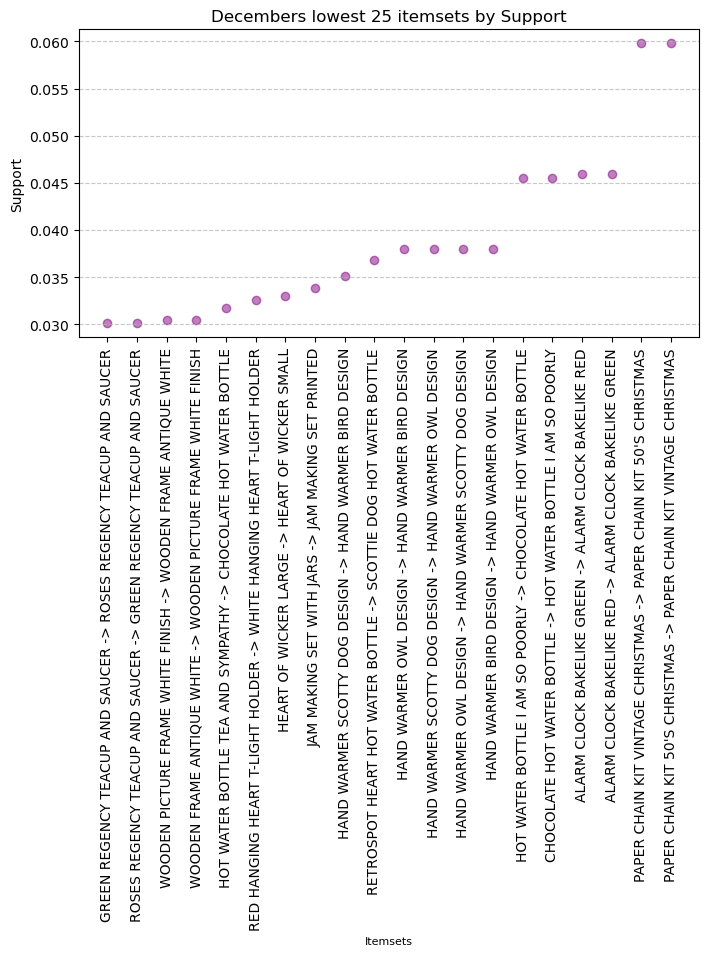

In [27]:
lowest_25_rules = rules.sort_values(by='support', ascending=True).head(25)

# Plot the lowest 25 rules by confidence
plt.figure(figsize=(8, 4))
plt.scatter(lowest_25_rules['itemsets'], lowest_25_rules['support'], color='purple', alpha=0.5)  # Adjust color and transparency as needed
plt.xlabel('Itemsets', fontsize=8)
plt.ylabel('Support')
plt.title('Decembers lowest 25 itemsets by Support')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [28]:
#by confidence
rules.sort_values(by="confidence", ascending= True)[:11]

,antecedents,consequents,support,confidence,lift,itemsets
4,(HOT WATER BOTTLE TEA AND SYMPATHY),(CHOCOLATE HOT WATER BOTTLE),0.031773,0.513514,5.877150,HOT WATER BOTTLE TEA AND SYMPATHY -> CHOCOLATE...
15,(PAPER CHAIN KIT 50'S CHRISTMAS),(PAPER CHAIN KIT VINTAGE CHRISTMAS),0.059783,0.516245,5.770370,PAPER CHAIN KIT 50'S CHRISTMAS -> PAPER CHAIN ...
2,(CHOCOLATE HOT WATER BOTTLE),(HOT WATER BOTTLE I AM SO POORLY),0.045569,0.521531,7.845927,CHOCOLATE HOT WATER BOTTLE -> HOT WATER BOTTLE...
8,(HAND WARMER BIRD DESIGN),(HAND WARMER OWL DESIGN),0.038043,0.526012,8.117546,HAND WARMER BIRD DESIGN -> HAND WARMER OWL DESIGN
17,(RETROSPOT HEART HOT WATER BOTTLE),(SCOTTIE DOG HOT WATER BOTTLE),0.036789,0.533333,5.851988,RETROSPOT HEART HOT WATER BOTTLE -> SCOTTIE DO...
18,(WOODEN FRAME ANTIQUE WHITE),(WOODEN PICTURE FRAME WHITE FINISH),0.030518,0.540741,12.088335,WOODEN FRAME ANTIQUE WHITE -> WOODEN PICTURE F...
12,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.033027,0.548611,7.585421,HEART OF WICKER LARGE -> HEART OF WICKER SMALL
7,(HAND WARMER OWL DESIGN),(HAND WARMER BIRD DESIGN),0.038043,0.587097,8.117546,HAND WARMER OWL DESIGN -> HAND WARMER BIRD DESIGN
11,(HAND WARMER OWL DESIGN),(HAND WARMER SCOTTY DOG DESIGN),0.038043,0.587097,10.402485,HAND WARMER OWL DESIGN -> HAND WARMER SCOTTY D...
13,(JAM MAKING SET WITH JARS),(JAM MAKING SET PRINTED),0.033863,0.591241,8.174845,JAM MAKING SET WITH JARS -> JAM MAKING SET PRI...


C:\Users\alons\AppData\Local\Temp\ipykernel_14148\457730766.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlapping labels


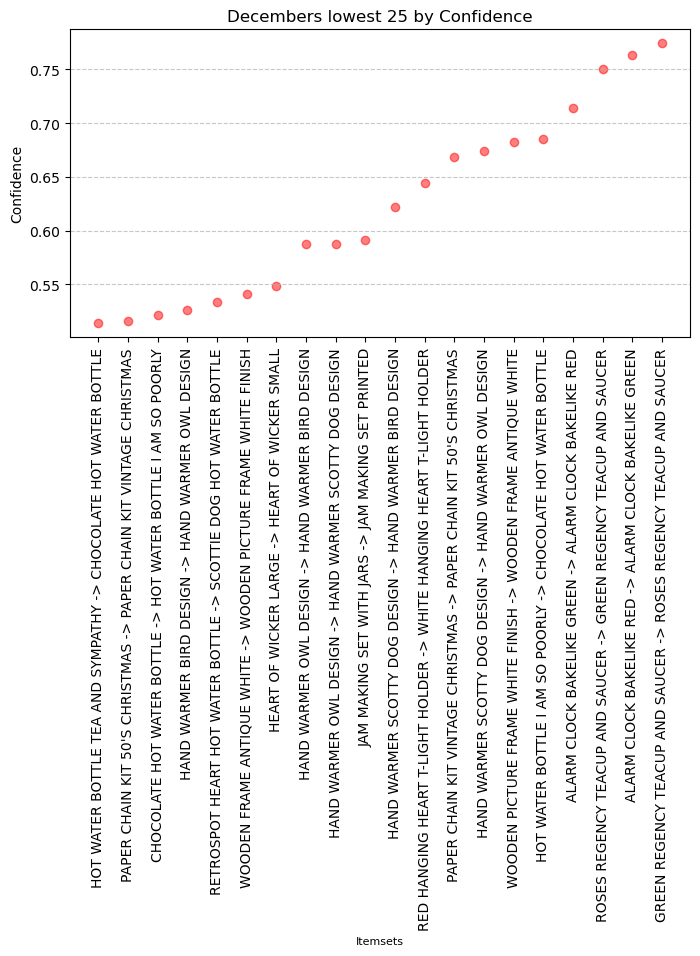

In [29]:
lowest_25_rules = rules.sort_values(by='confidence', ascending=True).head(25)

# Plot the lowest 25 rules by confidence
plt.figure(figsize=(8, 4))
plt.scatter(lowest_25_rules['itemsets'], lowest_25_rules['confidence'], color='red', alpha=0.5)  # Adjust color and transparency as needed
plt.xlabel('Itemsets', fontsize=8)
plt.ylabel('Confidence')
plt.title('Decembers lowest 25 by Confidence')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)  
plt.tight_layout() 
plt.show()

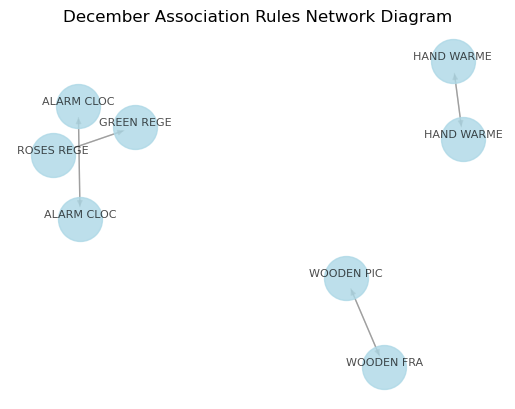

In [30]:
# Creating a threshold to get the top listed by "lift"
threshold_lift = 9
filtered_rules = rules[rules['lift'] >= threshold_lift]

# Create a directed graph
G = nx.DiGraph()

# Add nodes for antecedents and consequents
for _, row in filtered_rules.iterrows():
    for item in row['antecedents']:
        G.add_node(item)
    for item in row['consequents']:
        G.add_node(item)

# Add edges between antecedents and consequents
for _, row in filtered_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent)

# Set positions for nodes
pos = nx.spring_layout(G, scale=1000, k=1/len(G)**.1)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1, arrowsize=8, alpha=0.5)

# Add labels with adjusted positioning
nx.draw_networkx_labels(G, pos, labels={node: node[:10] for node in G.nodes()}, font_size=8, font_family='sans-serif', alpha=0.7, verticalalignment='bottom')

# Display the plot
plt.title('December Association Rules Network Diagram')
plt.axis('off')
plt.show()

C:\Users\alons\AppData\Local\Temp\ipykernel_14148\185002472.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


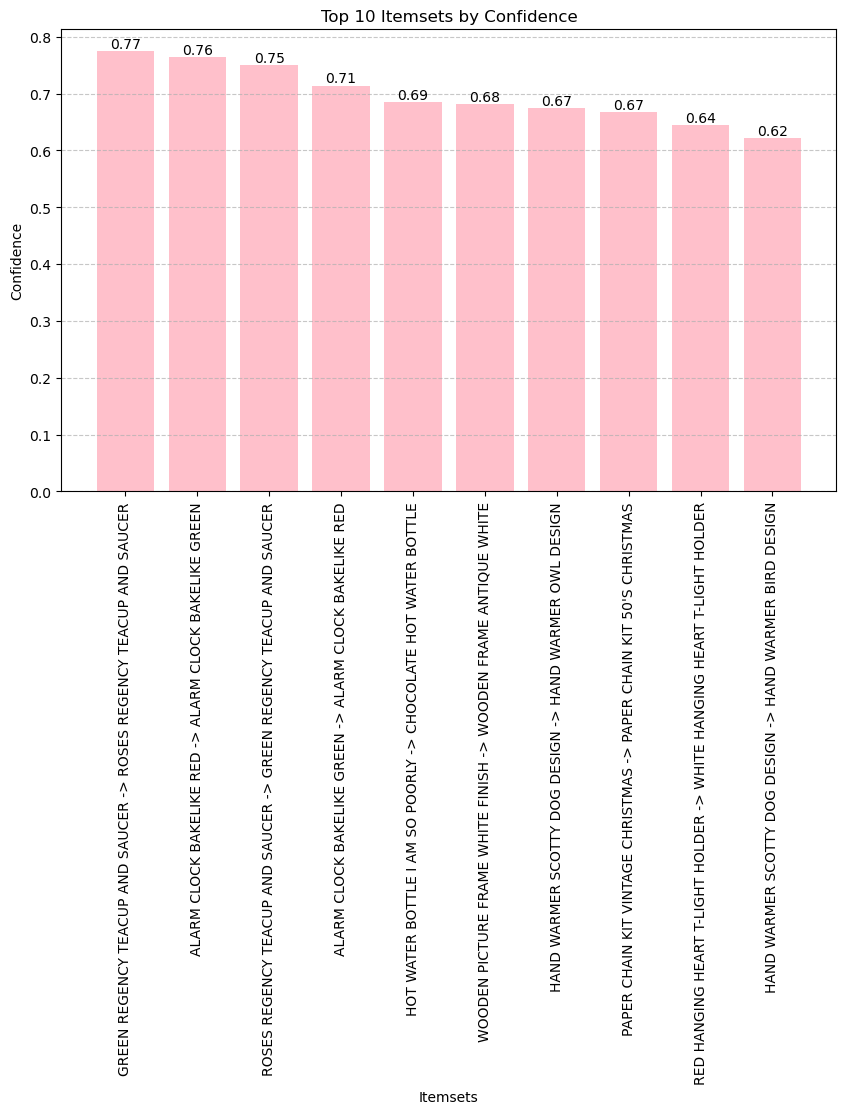

In [31]:
top_n_itemsets= rules.sort_values(by='confidence', ascending=False).head(10)
plt.figure(figsize=(10, 6))
bars = plt.bar(top_n_itemsets['itemsets'], top_n_itemsets['confidence'], color='pink')

# Annotating each bar with its confidence value
for i in range(len(bars)):
    plt.text(bars[i].get_x() + bars[i].get_width()/2, bars[i].get_height(), round(top_n_itemsets['confidence'].iloc[i], 2), 
             ha='center', va='bottom')

plt.title(f'Top 10 Itemsets by Confidence')
plt.xlabel('Itemsets')
plt.ylabel('Confidence')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\alons\AppData\Local\Temp\ipykernel_14148\1492897664.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


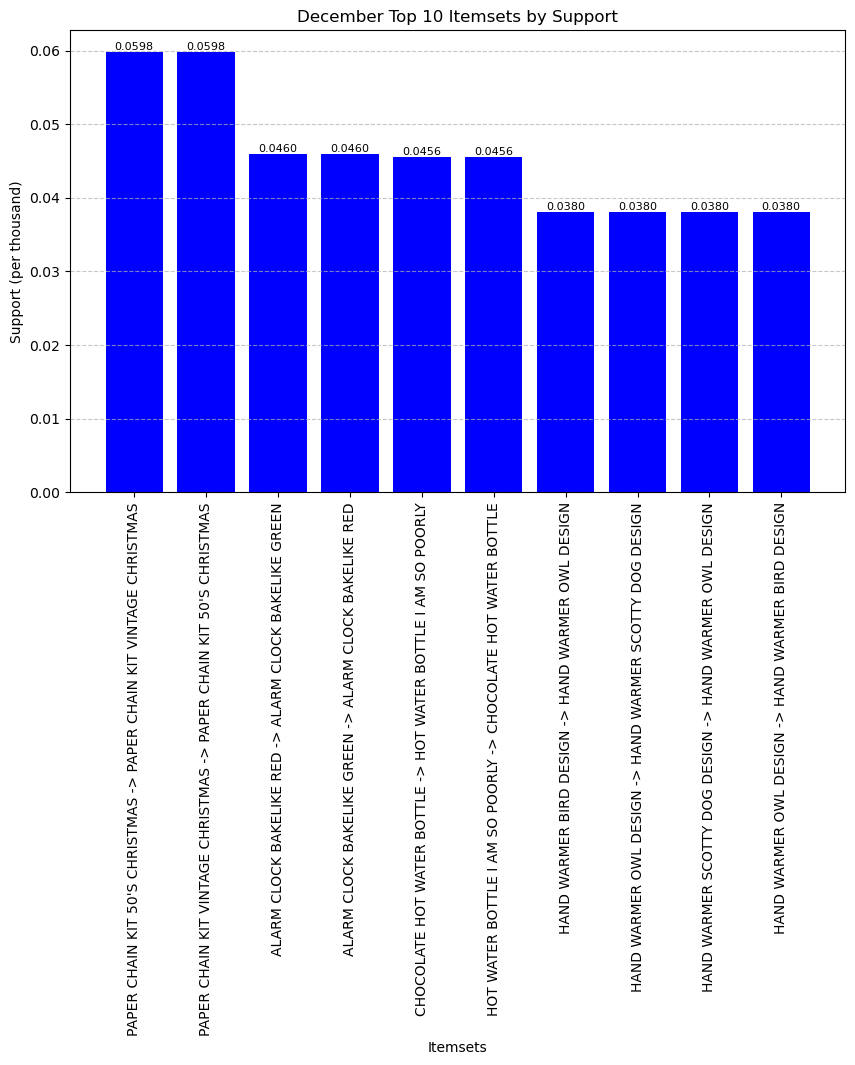

In [32]:
top_n_itemsets = rules.sort_values(by='support', ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_n_itemsets['itemsets'], top_n_itemsets['support'], color='blue')

# Add confidence values as text labels above each bar
for bar, support in zip(bars, top_n_itemsets['support']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{support * 1:.4f}', 
             ha='center', va='bottom', color='black', fontsize=8)

plt.title('December Top 10 Itemsets by Support')
plt.xlabel('Itemsets')
plt.ylabel('Support (per thousand)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()